In [114]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
import folium 
from folium import plugins
from tqdm.notebook import tqdm as tqdm
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd

In [115]:

TodaysData_Country = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
TodaysData_Country.head()

Country_Region          Last_Update      Lat     Long_  Confirmed  Deaths  \
0      Australia  2020-06-01 01:32:50 -25.0000  133.0000     7202.0   103.0   
1        Austria  2020-06-01 01:32:50  47.5162   14.5501    16731.0   668.0   
2         Canada  2020-06-01 01:32:50  60.0010  -95.0010    92479.0  7374.0   
3          China  2020-06-01 01:32:50  30.5928  114.3055    84135.0  4638.0   
4        Denmark  2020-06-01 01:32:50  56.2639    9.5018    11869.0   574.0   

   Recovered   Active  Incident_Rate  People_Tested  People_Hospitalized  \
0     6618.0    481.0      28.287843            NaN                  NaN   
1    15593.0    470.0     185.767898            NaN                  NaN   
2    49213.0  35892.0     244.293449            NaN                  NaN   
3    79388.0    109.0       5.989636            NaN                  NaN   
4    10560.0    735.0     204.913398            NaN                  NaN   

   Mortality_Rate  UID ISO3  
0        1.430158   36  AUS  
1        3.992589   40  AUT  
2        7.973702  124  CAN  
3        5.512569  156  CHN  
4        4.836128  208  DNK

In [116]:
ColumnToClean = ['Confirmed', 'Deaths', 'Recovered', 'Active']
# filling missing values 
TodaysData_Country[['Country_Region']] = TodaysData_Country[['Country_Region']].fillna('')
TodaysData_Country[ColumnToClean] = TodaysData_Country[ColumnToClean].fillna(0)
TodaysData_Country.loc[TodaysData_Country['Country_Region'] == "United Kingdom", "Country_Region"] = "UK"
TodaysData_Country.head()

Country_Region          Last_Update      Lat     Long_  Confirmed  Deaths  \
0      Australia  2020-06-01 01:32:50 -25.0000  133.0000     7202.0   103.0   
1        Austria  2020-06-01 01:32:50  47.5162   14.5501    16731.0   668.0   
2         Canada  2020-06-01 01:32:50  60.0010  -95.0010    92479.0  7374.0   
3          China  2020-06-01 01:32:50  30.5928  114.3055    84135.0  4638.0   
4        Denmark  2020-06-01 01:32:50  56.2639    9.5018    11869.0   574.0   

   Recovered   Active  Incident_Rate  People_Tested  People_Hospitalized  \
0     6618.0    481.0      28.287843            NaN                  NaN   
1    15593.0    470.0     185.767898            NaN                  NaN   
2    49213.0  35892.0     244.293449            NaN                  NaN   
3    79388.0    109.0       5.989636            NaN                  NaN   
4    10560.0    735.0     204.913398            NaN                  NaN   

   Mortality_Rate  UID ISO3  
0        1.430158   36  AUS  
1        3.992589   40  AUT  
2        7.973702  124  CAN  
3        5.512569  156  CHN  
4        4.836128  208  DNK

In [117]:
# Top 10 Countries
Top10_Countries_death = TodaysData_Country.drop(['Last_Update', 'Lat','Long_','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'], axis=1) 
Top10_Countries_death = Top10_Countries_death.nlargest(10, 'Deaths')
Top10_Countries_death.head(10)

Country_Region  Confirmed    Deaths  Recovered     Active
17             US  1789364.0  104358.0   444758.0  1295080.0
16             UK   276156.0   38571.0     1190.0   236395.0
10          Italy   232997.0   33415.0   157507.0    42075.0
21         Brazil   514849.0   29314.0   206555.0   278980.0
6          France   189009.0   28805.0    68473.0    91731.0
18          Spain   239479.0   27127.0   150376.0    61976.0
19         Mexico    90664.0    9930.0    63772.0    16962.0
39        Belgium    58381.0    9467.0    15887.0    33027.0
7         Germany   183410.0    8540.0   165352.0     9518.0
94           Iran   151466.0    7797.0   118848.0    24821.0

In [118]:
Top10_Countries_Confirmed = TodaysData_Country.drop(['Last_Update', 'Lat','Long_','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'], axis=1) 
Top10_Countries_Confirmed = Top10_Countries_Confirmed.nlargest(10, 'Confirmed')
Top10_Countries_Confirmed.head(10)

Country_Region  Confirmed    Deaths  Recovered     Active
17             US  1789364.0  104358.0   444758.0  1295080.0
21         Brazil   514849.0   29314.0   206555.0   278980.0
13         Russia   405843.0    4693.0   171883.0   229267.0
16             UK   276156.0   38571.0     1190.0   236395.0
18          Spain   239479.0   27127.0   150376.0    61976.0
10          Italy   232997.0   33415.0   157507.0    42075.0
92          India   190609.0    5408.0    91852.0    93349.0
6          France   189009.0   28805.0    68473.0    91731.0
7         Germany   183410.0    8540.0   165352.0     9518.0
22           Peru   164476.0    4506.0    67208.0    92762.0

In [119]:
Top10_Countries_Recovered = TodaysData_Country.drop(['Last_Update', 'Lat','Long_','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'], axis=1) 
Top10_Countries_Recovered = Top10_Countries_Recovered.nlargest(10, 'Recovered')
Top10_Countries_Recovered.head(10)

Country_Region  Confirmed    Deaths  Recovered     Active
17              US  1789364.0  104358.0   444758.0  1295080.0
21          Brazil   514849.0   29314.0   206555.0   278980.0
13          Russia   405843.0    4693.0   171883.0   229267.0
7          Germany   183410.0    8540.0   165352.0     9518.0
10           Italy   232997.0   33415.0   157507.0    42075.0
18           Spain   239479.0   27127.0   150376.0    61976.0
175         Turkey   163942.0    4540.0   127973.0    31429.0
94            Iran   151466.0    7797.0   118848.0    24821.0
92           India   190609.0    5408.0    91852.0    93349.0
3            China    84135.0    4638.0    79388.0      109.0

In [120]:
Top10_Countries_Active = TodaysData_Country.drop(['Last_Update', 'Lat','Long_','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'], axis=1) 
Top10_Countries_Active = Top10_Countries_Active.nlargest(10, 'Active')
Top10_Countries_Active.head(10)

Country_Region  Confirmed    Deaths  Recovered     Active
17              US  1789364.0  104358.0   444758.0  1295080.0
21          Brazil   514849.0   29314.0   206555.0   278980.0
16              UK   276156.0   38571.0     1190.0   236395.0
13          Russia   405843.0    4693.0   171883.0   229267.0
92           India   190609.0    5408.0    91852.0    93349.0
22            Peru   164476.0    4506.0    67208.0    92762.0
6           France   189009.0   28805.0    68473.0    91731.0
18           Spain   239479.0   27127.0   150376.0    61976.0
20           Chile    99688.0    1054.0    42727.0    55907.0
137       Pakistan    69496.0    1483.0    25271.0    42742.0

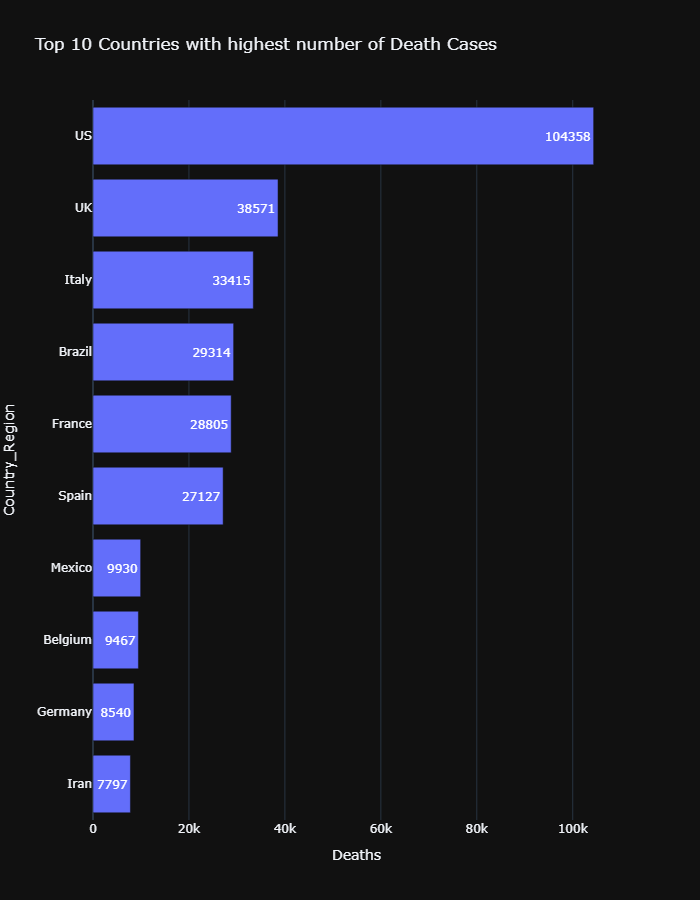

In [121]:
fig = px.bar(Top10_Countries_death.sort_values('Deaths',ascending=False)[:20][::-1],x='Deaths',y='Country_Region',title='Top 10 Countries with highest number of Death Cases',text='Deaths', height=900, orientation='h')

#image_bytes = fig.to_image(format='png', , width=1200, height=700, scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')
img_bytes = fig.to_image(format="png")
#instead of using fig.show()
from IPython.display import Image
Image(img_bytes)
#fig.show()



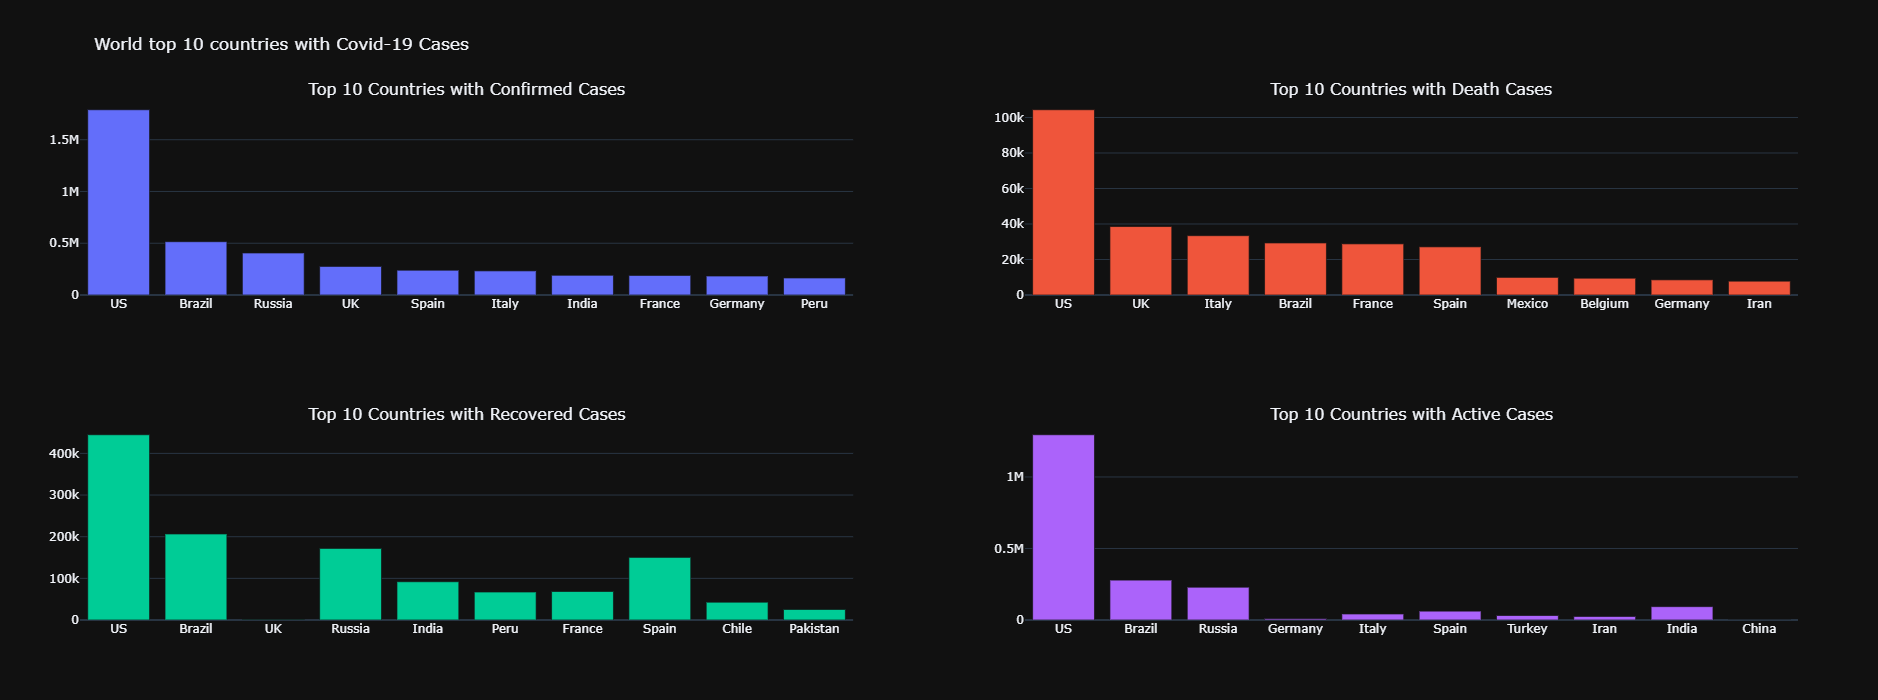

In [122]:

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=("Top 10 Countries with Confirmed Cases","Top 10 Countries with Death Cases", "Top 10 Countries with Recovered Cases", "Top 10 Countries with Active Cases")
)

fig.add_trace(go.Bar(name='Confirmed',text='Confirmed', x=Top10_Countries_Confirmed['Country_Region'], y=Top10_Countries_Confirmed['Confirmed']),
              row=1, col=1)


fig.add_trace(go.Bar(name='Deaths',text='Deaths', x=Top10_Countries_death['Country_Region'], y=Top10_Countries_death['Deaths']),
              row=1, col=2)

fig.add_trace(go.Bar(name='Recovered', text='Recovered',x=Top10_Countries_Active['Country_Region'], y=Top10_Countries_Active['Recovered']),
              row=2, col=1)

fig.add_trace(go.Bar(name='Active',text='Active', x=Top10_Countries_Recovered['Country_Region'], y=Top10_Countries_Recovered['Active']),
              row=2, col=2)

fig.update_layout(height=700,title_text="World top 10 countries with Covid-19 Cases", showlegend=False)

fig.show()

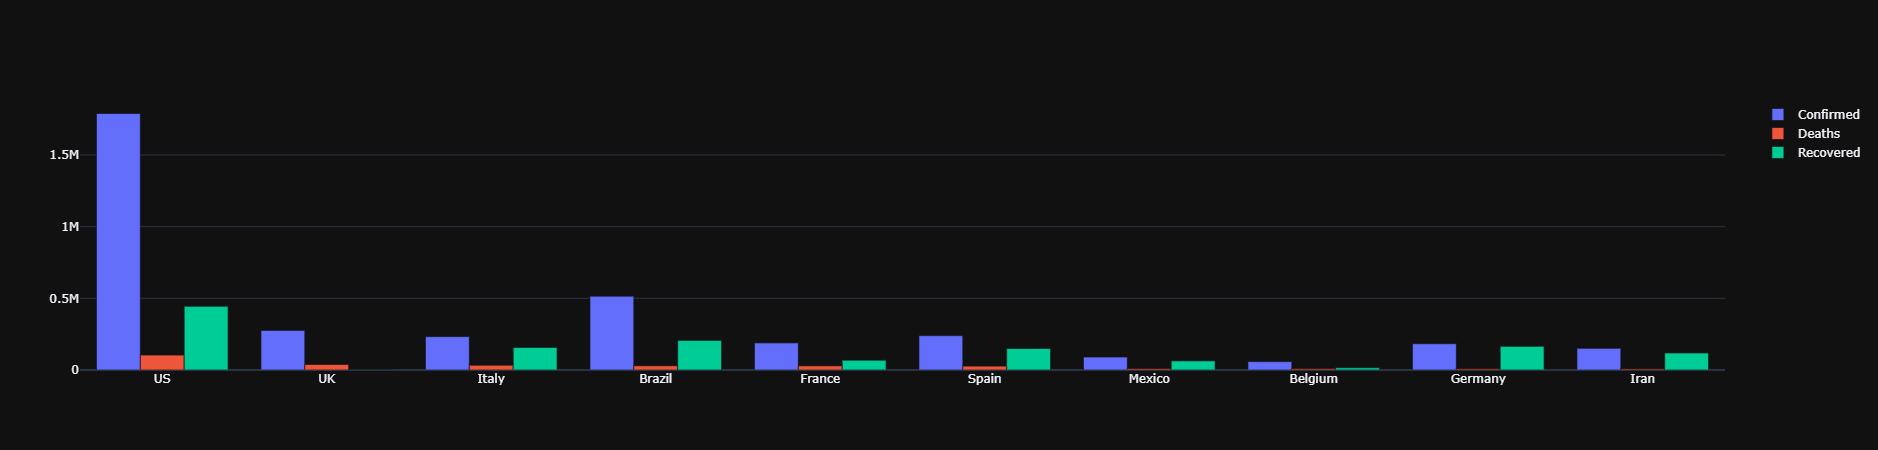

In [123]:
fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=Top10_Countries_death['Country_Region'], y=Top10_Countries_death['Confirmed']),
     go.Bar(name='Deaths', x=Top10_Countries_death['Country_Region'], y=Top10_Countries_death['Deaths']),
     go.Bar(name='Recovered', x=Top10_Countries_death['Country_Region'], y=Top10_Countries_death['Recovered']),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [124]:
cleaned_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv')

cleaned_data.head()

Country_Region Last_Update  Confirmed  Deaths  Recovered  Active  \
0    Afghanistan     1/22/20          0       0        NaN     NaN   
1    Afghanistan     1/23/20          0       0        NaN     NaN   
2    Afghanistan     1/24/20          0       0        NaN     NaN   
3    Afghanistan     1/25/20          0       0        NaN     NaN   
4    Afghanistan     1/26/20          0       0        NaN     NaN   

   Delta_Confirmed  Delta_Recovered  Incident_Rate  People_Tested  \
0              0.0              NaN            0.0            NaN   
1              0.0              NaN            0.0            NaN   
2              0.0              NaN            0.0            NaN   
3              0.0              NaN            0.0            NaN   
4              0.0              NaN            0.0            NaN   

   People_Hospitalized Province_State  FIPS  UID iso3 Report_Date_String  
0                  NaN            NaN   NaN    4  AFG         2020/01/22  
1                  NaN            NaN   NaN    4  AFG         2020/01/23  
2                  NaN            NaN   NaN    4  AFG         2020/01/24  
3                  NaN            NaN   NaN    4  AFG         2020/01/25  
4                  NaN            NaN   NaN    4  AFG         2020/01/26

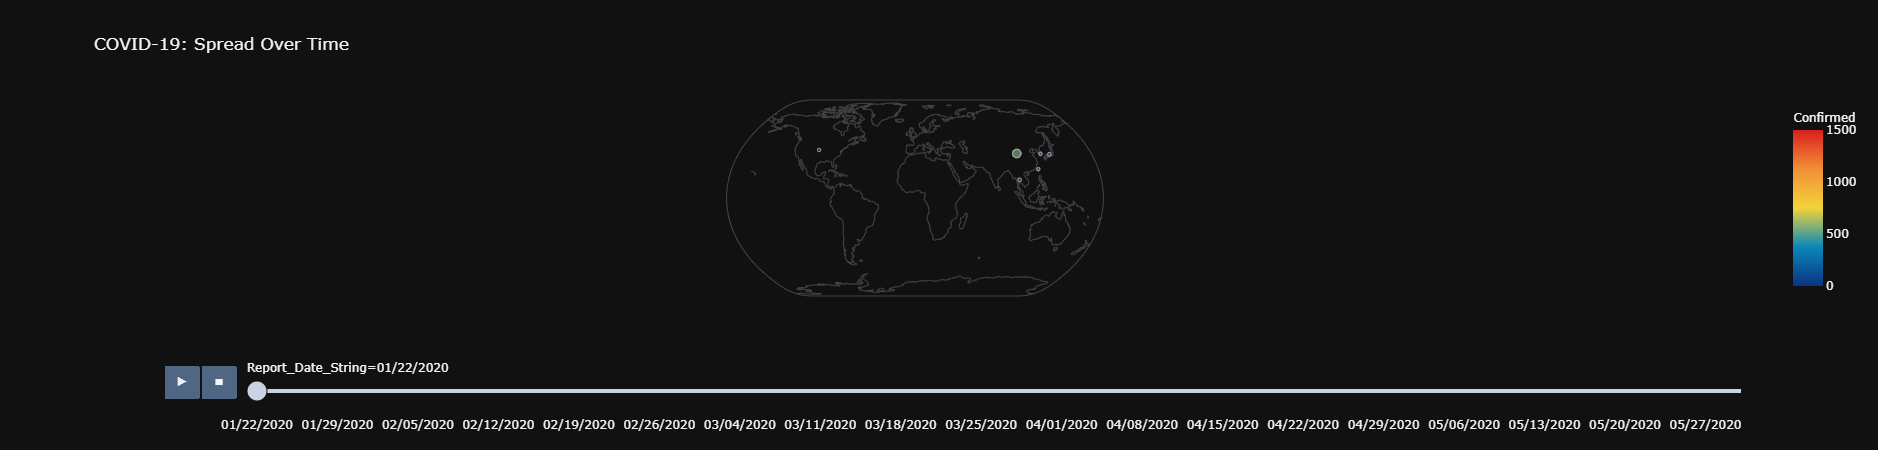

In [125]:
formated_gdf = cleaned_data.groupby(['Report_Date_String', 'Country_Region'])['Confirmed'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Report_Date_String'] = pd.to_datetime(formated_gdf['Report_Date_String'])
formated_gdf['Report_Date_String'] = formated_gdf['Report_Date_String'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country_Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country_Region", 
                     range_color= [0, 1500], 
                     projection="natural earth", animation_frame="Report_Date_String", 
                     title='COVID-19: Spread Over Time', color_continuous_scale="portland")
# fig.update(layout_coloraxis_showscale=False)
fig.show()

In [127]:
owid_covid_data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
owid_covid_data_Selected = owid_covid_data[['date','new_cases','new_deaths']]
#Set 0 for NAN
#ColumnNan = ['new_cases','new_deaths']
#owid_covid_data_Selected[ColumnNan] = owid_covid_data_Selected[ColumnNan].fillna(0)
owid_covid_data_Selected.tail()
#owid_covid_data.head()
# W weekly frequency

date  new_cases  new_deaths
20971  2020-02-28          0           0
20972  2020-02-29          0           2
20973  2020-03-01          0           0
20974  2020-03-02          0           0
20975  2020-03-10         -9           1

In [51]:
owid_covid_newcases = owid_covid_data_Selected.groupby(['date'])['new_cases'].sum()
owid_covid_newcases = owid_covid_newcases.reset_index()
owid_covid_newcases['date'] = pd.to_datetime(owid_covid_newcases['date'])
owid_covid_newcases['date'] = owid_covid_newcases['date'].dt.strftime('%m/%d/%Y')
owid_covid_newcases.head()

owid_covid_newdeaths = owid_covid_data_Selected.groupby(['date'])['new_deaths'].sum()
owid_covid_newdeaths = owid_covid_newdeaths.reset_index()
owid_covid_newdeaths['date'] = pd.to_datetime(owid_covid_newdeaths['date'])
owid_covid_newdeaths['date'] = owid_covid_newdeaths['date'].dt.strftime('%m/%d/%Y')
owid_covid_newdeaths.head()

date  new_deaths
0  12/31/2019           0
1  01/01/2020           0
2  01/02/2020           0
3  01/03/2020           0
4  01/04/2020           0

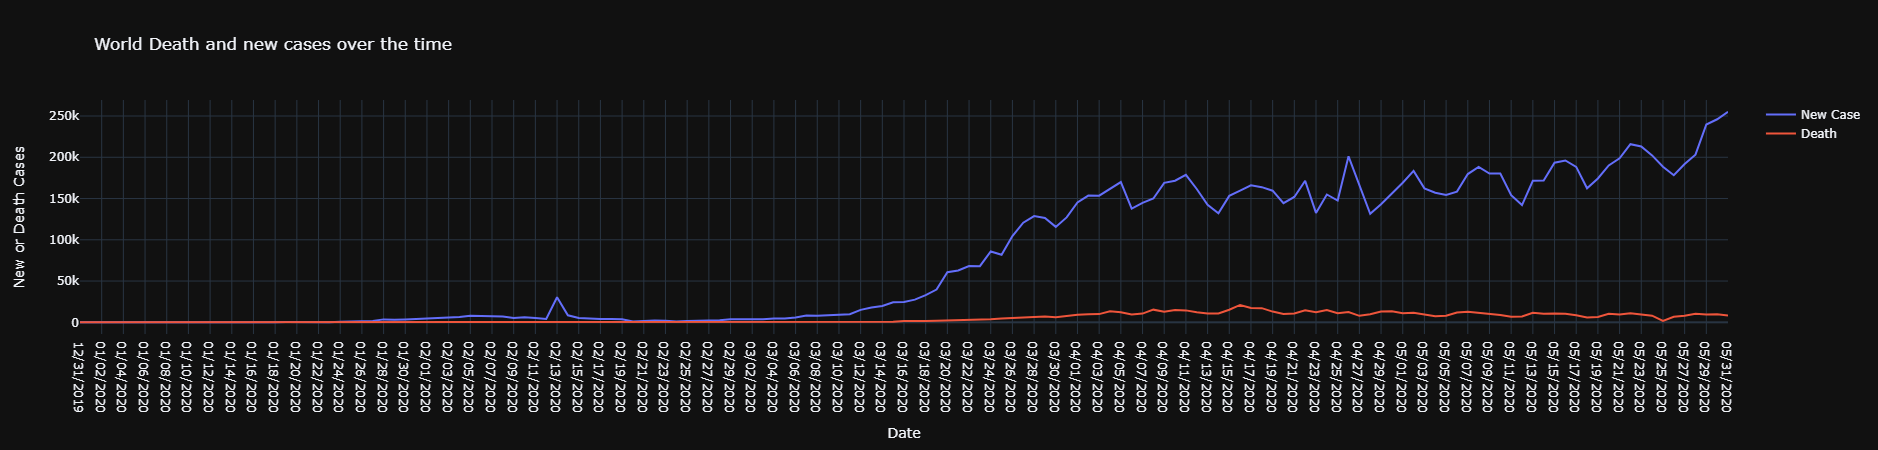

In [64]:
fig = go.Figure(data=[
    go.Line(x=owid_covid_newcases['date'], y=owid_covid_newcases['new_cases'],mode='lines',name='New Case'),
     go.Line(x=owid_covid_newdeaths['date'], y=owid_covid_newdeaths['new_deaths'],mode='lines',name='Death'),
])

fig.update_layout(
    title="TrendLine - World Death and new cases over the time",
    yaxis_title="New or Death Cases",
    xaxis_title="Date",
    showlegend=True
)
fig.show()

In [101]:
Top10_Countries = Top10_Countries_death[['Country_Region']]
Top10_Countries.loc[Top10_Countries['Country_Region'] == "UK", "Country_Region"] = "United Kingdom"
Top10_Countries.loc[Top10_Countries['Country_Region'] == "US", "Country_Region"] = "United States"
filter_list = Top10_Countries['Country_Region']. values. tolist()
owid_Top10_Countries = owid_covid_data.loc[owid_covid_data['location'].isin(filter_list)]

Top10_gdp_per_capita =  owid_Top10_Countries.groupby(['location'])['gdp_per_capita'].max().to_frame(name = 'gdp_per_capita').reset_index()
Top10_cvd_death_rate =  owid_Top10_Countries.groupby(['location'])['cvd_death_rate'].max().to_frame(name = 'cvd_death_rate').reset_index()
Top10_diabetes_prevalence =  owid_Top10_Countries.groupby(['location'])['diabetes_prevalence'].max().to_frame(name = 'diabetes_prevalence').reset_index()
Top10_female_smokers =  owid_Top10_Countries.groupby(['location'])['female_smokers'].max().to_frame(name = 'female_smokers').reset_index()
Top10_male_smokers =  owid_Top10_Countries.groupby(['location'])['male_smokers'].max().to_frame(name = 'male_smokers').reset_index()
Top10_hospital_beds_per_100k =  owid_Top10_Countries.groupby(['location'])['hospital_beds_per_100k'].max().to_frame(name = 'hospital_beds_per_100k').reset_index()

Top10_cvd_death_rate.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



location  cvd_death_rate
0  Belgium         114.898
1   Brazil         177.961
2   France          86.060
3  Germany         156.139
4     Iran         270.308

In [110]:
Bottom10_Countries_death = TodaysData_Country.drop(['Last_Update', 'Lat','Long_','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'], axis=1) 
Bottom10_Countries_death = Bottom10_Countries_death.loc[(Bottom10_Countries_death['Deaths'] >= 1)].nsmallest(10, 'Deaths')
Bottom10_Countries_death.head(10)
Bottom10_Countries = Bottom10_Countries_death[['Country_Region']]
Bottom10_Countries.loc[Bottom10_Countries['Country_Region'] == "UK", "Country_Region"] = "United Kingdom"
Bottom10_Countries.loc[Bottom10_Countries['Country_Region'] == "US", "Country_Region"] = "United States"
filter_list = Bottom10_Countries['Country_Region']. values. tolist()
owid_Bottom10_Countries = owid_covid_data.loc[owid_covid_data['location'].isin(filter_list)]

Bottom10_gdp_per_capita =  owid_Bottom10_Countries.groupby(['location'])['gdp_per_capita'].max().to_frame(name = 'gdp_per_capita').reset_index()
Bottom10_cvd_death_rate =  owid_Bottom10_Countries.groupby(['location'])['cvd_death_rate'].max().to_frame(name = 'cvd_death_rate').reset_index()
Bottom10_diabetes_prevalence =  owid_Bottom10_Countries.groupby(['location'])['diabetes_prevalence'].max().to_frame(name = 'diabetes_prevalence').reset_index()
Bottom10_female_smokers =  owid_Bottom10_Countries.groupby(['location'])['female_smokers'].max().to_frame(name = 'female_smokers').reset_index()
Bottom10_male_smokers =  owid_Bottom10_Countries.groupby(['location'])['male_smokers'].max().to_frame(name = 'male_smokers').reset_index()
Bottom10_hospital_beds_per_100k =  owid_Bottom10_Countries.groupby(['location'])['hospital_beds_per_100k'].max().to_frame(name = 'hospital_beds_per_100k').reset_index()
Bottom10_gdp_per_capita.head(10)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



location  gdp_per_capita
0                    Belize        7824.362
1                  Botswana       15807.374
2                    Brunei       71809.251
3                   Burundi         702.225
4  Central African Republic         661.240
5                    Gambia        1561.767
6             Liechtenstein             NaN
7                    Rwanda        1854.211
8                  Suriname       13767.119
9            Western Sahara             NaN

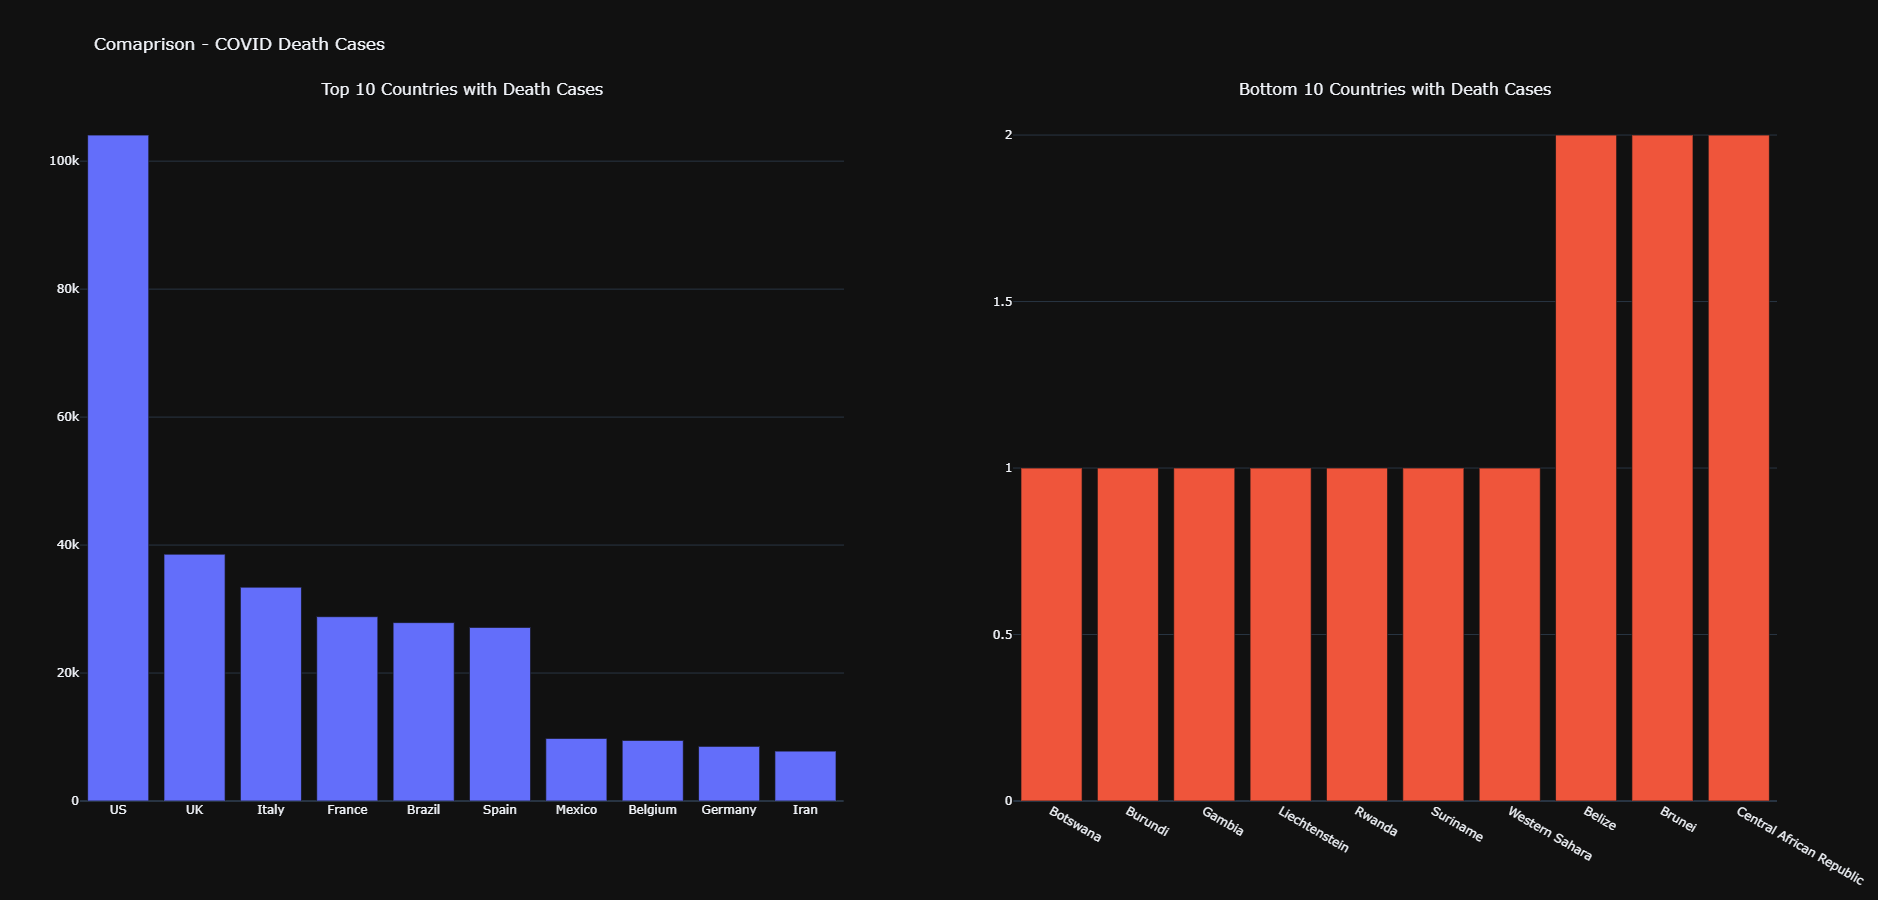

In [111]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=("Top 10 Countries with Death Cases","Bottom 10 Countries with Death Cases")
)

fig.add_trace(go.Bar(name='Deaths',text='Deaths', x=Top10_Countries_death['Country_Region'], y=Top10_Countries_death['Deaths']),
              row=1, col=1)

fig.add_trace(go.Bar(name='Deaths',text='Deaths', x=Bottom10_Countries_death['Country_Region'], y=Bottom10_Countries_death['Deaths']),
              row=1, col=2)
fig.update_layout(height=900,title_text="Comaprison - COVID Death Cases", showlegend=False)

fig.show()

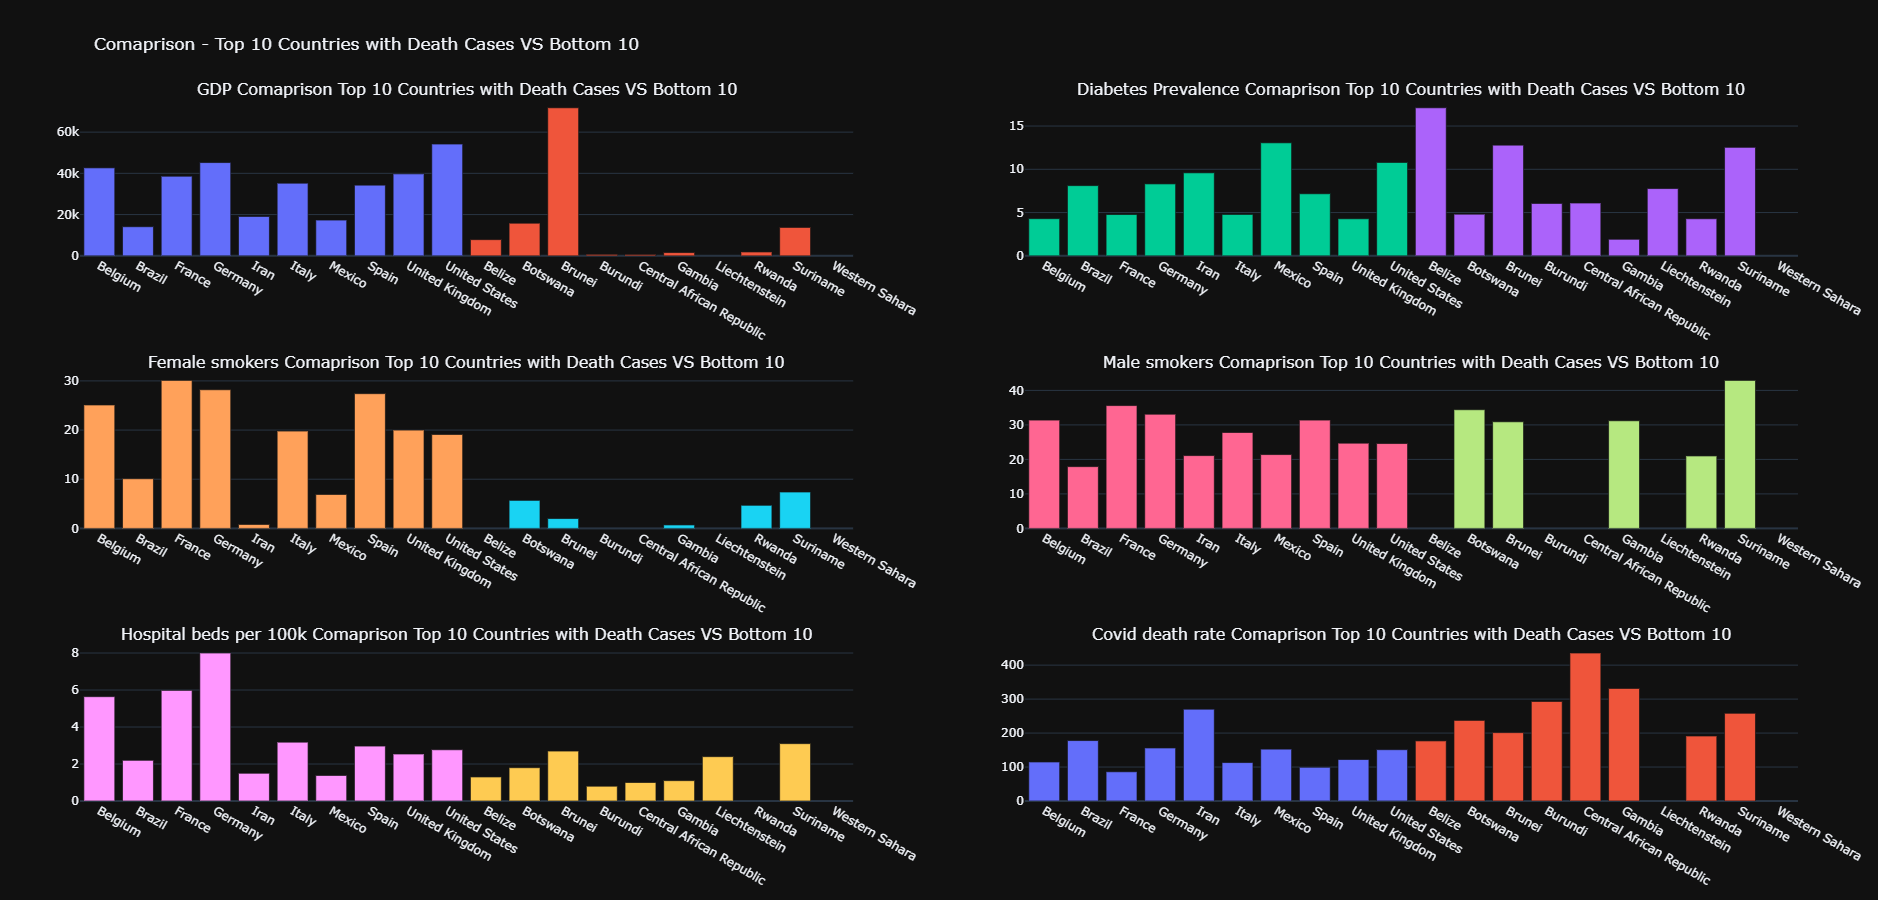

In [112]:
fig = make_subplots(
    rows=3, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}],
            [{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=("GDP Comaprison Top 10 Countries with Death Cases VS Bottom 10","Diabetes Prevalence Comaprison Top 10 Countries with Death Cases VS Bottom 10", "Female smokers Comaprison Top 10 Countries with Death Cases VS Bottom 10", "Male smokers Comaprison Top 10 Countries with Death Cases VS Bottom 10","Hospital beds per 100k Comaprison Top 10 Countries with Death Cases VS Bottom 10", "Covid death rate Comaprison Top 10 Countries with Death Cases VS Bottom 10")
)

fig.add_trace(go.Bar(name='gdp_per_capita',text='gdp_per_capita', x=Top10_gdp_per_capita['location'], y=Top10_gdp_per_capita['gdp_per_capita']),
              row=1, col=1)

fig.add_trace(go.Bar(name='gdp_per_capita',text='gdp_per_capita', x=Bottom10_gdp_per_capita['location'], y=Bottom10_gdp_per_capita['gdp_per_capita']),
              row=1, col=1)

fig.add_trace(go.Bar(name='diabetes_prevalence',text='diabetes_prevalence', x=Top10_diabetes_prevalence['location'], y=Top10_diabetes_prevalence['diabetes_prevalence']),
              row=1, col=2)

fig.add_trace(go.Bar(name='diabetes_prevalence', text='diabetes_prevalence',x=Bottom10_diabetes_prevalence['location'], y=Bottom10_diabetes_prevalence['diabetes_prevalence']),
              row=1, col=2)




fig.add_trace(go.Bar(name='female_smokers',text='female_smokers', x=Top10_female_smokers['location'], y=Top10_female_smokers['female_smokers']),
              row=2, col=1)

fig.add_trace(go.Bar(name='female_smokers',text='female_smokers', x=Bottom10_female_smokers['location'], y=Bottom10_female_smokers['female_smokers']),
              row=2, col=1)

fig.add_trace(go.Bar(name='male_smokers',text='male_smokers', x=Top10_male_smokers['location'], y=Top10_male_smokers['male_smokers']),
              row=2, col=2)

fig.add_trace(go.Bar(name='male_smokers', text='male_smokers',x=Bottom10_male_smokers['location'], y=Bottom10_male_smokers['male_smokers']),
              row=2, col=2)




fig.add_trace(go.Bar(name='hospital_beds_per_100k',text='hospital_beds_per_100k', x=Top10_hospital_beds_per_100k['location'], y=Top10_hospital_beds_per_100k['hospital_beds_per_100k']),
              row=3, col=1)

fig.add_trace(go.Bar(name='hospital_beds_per_100k',text='hospital_beds_per_100k', x=Bottom10_hospital_beds_per_100k['location'], y=Bottom10_hospital_beds_per_100k['hospital_beds_per_100k']),
              row=3, col=1)

fig.add_trace(go.Bar(name='cvd_death_rate',text='cvd_death_rate', x=Top10_cvd_death_rate['location'], y=Top10_cvd_death_rate['cvd_death_rate']),
              row=3, col=2)

fig.add_trace(go.Bar(name='cvd_death_rate', text='cvd_death_rate',x=Bottom10_cvd_death_rate['location'], y=Bottom10_cvd_death_rate['cvd_death_rate']),
              row=3, col=2)


fig.update_layout(height=900,title_text="Comaprison - Top 10 Countries with Death Cases VS Bottom 10", showlegend=False)

fig.show()